# Review of Calculus 1

This lab reviews some needed ideas from calculs 1. We will cover

1- Derivatives, 

2- Linear Approximation, 

3- Approximations using Taylor series


## Derivatives

Derivative is the rate of change in a function with respect to changes in its variables. Derivatives can tell us how rapidly a function increase or decrease if we increase or decrease each variable by a small amount. 

Formally,suppose $f:\mathbb{R}\to \mathbb{R}$ is a function. The __derivative of $\boldsymbol{f(x)}$ with respect to $x$__, is defined as 

$$f\,'(x)=\lim\limits_{h\to 0}\dfrac{f(x+h)-f(x)}{h}$$

If derivative $f\,'(x)$ exists at all point in the interval $(a,b)$, then $f(x)$ is said to be __differentiable__ in $(a,b)$.

The derivative of $f$ at $x = a$ can be interpreted as the slope of the tangent line at $(a,f(a))$ on the graph of the function $f$. If $f$ is increasing (decreasing) on some interval, then the slope of the tangent is positive (negative) at each point of that interval, and hence, the derivative of the function is positive (negative). 

The most common notations for derivitive of a function $f$ were introduced by Lagrange and Leibniz:

- Lagrange: $f'(x),f^{(2)}(x),f^{(3)}(x), \ldots$

- Leibniz: $\dfrac{df}{dx}, \dfrac{d^2f}{dx^2}, \dfrac{d^3f}{dx^3}, \ldots$


__Example 1__ Let $f(x) = 2x^3 -2x$. Plug in small numbers in $\dfrac{f(0+h)-f(0)}{h}$ to guess the value of $f'(1)$.

In [42]:
import numpy as np

def f(x):
    return 2*x ** 3 - 2 * x

#setting x =1
x = 0

for h in 10.0**np.arange(-1, -6, -1):# a list of small numbers of h
    limit = (f(x+h)-f(x))/h
    print(f'h = {h:.5f}, limit = {limit:.5f}') # {:.5} specifies the level of precision
    

h = 0.10000, limit = -1.98000
h = 0.01000, limit = -1.99980
h = 0.00100, limit = -2.00000
h = 0.00010, limit = -2.00000
h = 0.00001, limit = -2.00000


We can see that as we decrease the value of $h$ the limit approaches $-2$. 

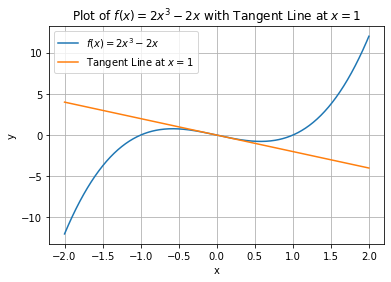

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tangent line at x = 0
def tangent_line(x):
    return -2 * x  # The tangent line at x = 0 is the x-axis

# Create a range of x values
x_vals = np.linspace(-2, 2, 400)

# Calculate the function values and tangent line values
y_vals = f(x_vals)
tangent_vals = tangent_line(x_vals)

# Create the plot
plt.plot(x_vals, y_vals, label='$f(x) = 2x^3 -2x$')
plt.plot(x_vals, tangent_vals, label='Tangent Line at $x = 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = 2x^3 -2x$ with Tangent Line at $x = 1$')
plt.legend()
plt.grid(True)
plt.show()


#### Review of properties of derivatives


1- __Derivative of algebraic operations__

- Sum and Difference.<br>
    $\left[f \pm g\right]' = f' \pm g'\quad\quad \text{or} \quad \quad \dfrac{d}{dx}\left[f \pm g\right] = \dfrac{df}{dx} \pm \dfrac{dg}{dx} $ 

- Scalar Product.<br>
    $\quad \left[c\cdot f\right]' = c\cdot f' \quad\quad \text{or} \quad \quad \dfrac{d}{dx}\left[c\cdot f\right] = c \cdot \dfrac{df}{dx}$

- Product Rule:.<br>
    $\quad \left[f\cdot g\right]'=f\,'\cdot g+f \cdot g\,'$
    
- Quotient Rule: <br>
    $\left[\dfrac{f}{g}\right]' = \dfrac{f\,'\cdot g - f \cdot g\,'}{g^2}$
    
- Chain Rule - for composition of two functions $(f\circ g)(x) = f(g(x))$: <br>
    $\left[\left(f \circ g\right)(x)\right]' = f\,'(g(x))\cdot g\,'(x) \quad\quad \text{or} \quad \quad \dfrac{df}{dx}=\dfrac{df}{dg}\cdot \dfrac{dg}{dx}$    



2- __Basic Derivative Formulas:__

- Constant by itself:<br>
    $\dfrac{d}{dx}\left[c\right]= 0$
    
- Power function: <br>
    $\dfrac{d}{dx}\left[x^n\right]= nx^{n-1}$
    
- Exponential function: <br> 
    $\dfrac{d}{dx}\left[b^x\right]= b^x\cdot \ln(b)$
    
- Special exponential function when $b=e$: <br>
    $\dfrac{d}{dx}\left[e^x\right]= e^x \cdot \ln(e)= e^x \cdot 1= e^x$
    
- Natural log funcion: <br>
    $\dfrac{d}{dx}\left[\ln(x)\right]= \dfrac{1}{x}$
    
- Sine function: <br>
    $\dfrac{d}{dx}\left[\sin(x)\right]= \cos(x)$
    
- Cosine function: <br>
    $\dfrac{d}{dx}\left[\cos(x)\right]= -\sin(x)$


__Examople__ Use `sympy` to find the derivative of $f(x) = e^{cos(x)} - 3x^2$. 

In [4]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define the function
f = sp.exp(sp.cos(x)) - 3 * x**2

# Find the derivative
f_prime = sp.diff(f, x)

# Print the derivative
print(f_prime)

-6*x - exp(cos(x))*sin(x)


## Linear Approximation

Let $f:\mathbb{R}\to \mathbb{R}$. A linear approximation of $f$ is a linear function ($L = mx + h$) that approximates $f$. When $f$ is differentionable, finding such approximation is easy: 

$$
f'(a) \approx \frac{f(a +h) -f(a)}{h} \quad \text{for small values of } h
$$

Replacing $f'(a)$ with $\frac{df}{dx}(a)$, and solving for $f(a + h)$, we have

$$
f(a + h) \approx f(a) + h \ \frac{df}{dx}(a) \quad \text{for small values of } h \quad 
$$

Note that the right hand side is a line which passes through the point $(x, f(x))$ and has slope $\frac{df}{dx}(x)$. And it approximates the value of $f$. So the derivative gives a linear approximation to the function $f$, as illustrated in __Example 1__.

### Approximations using Taylor series

The *Taylor series* provides a method to approximate a function with a polynomial. More formally, if we are given values for the first $n$ derivatives of $f(x)$ at a point $x_0$, i.e., $\left\{ f(x_0), f^{(1)}(x_0), f^{(2)}(x_0), \ldots, f^{(n)}(x_0) \right\}$, then, we are looking for a polynomial of degree $n$ that matches all the given derivatives at $x_0$.

We saw the case of $n = 1 $ in the previous section which we approximated a function by a line (a polynomial of degree 1). Let's see how we can find such polynomial for an arbitary $n$ using Tylor series.


Assume that our function $f$ is infinitely many times differentiable. Then,

$$
f(x) = \sum_{i = 0}^{\infty} \frac{f^{(i)}(x_0)}{i!}(x-x_0)^{i}.
$$

Where
$$
f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.
$$

From here we just need to cut off the tail of this series at $n$ to get a polynomial of degree $n$ that approximates $f$.

For example, when $n = 2$ we have:
$$
f(x) \approx \frac{1}{2}\frac{d^2f}{dx^2}(x_0)(x-x_0)^{2}+ \frac{df}{dx}(x_0)(x-x_0) + f(x_0).
$$

And if $n=3$, we will have

$$
f(x) \approx \frac{\frac{d^3f}{dx^3}(x_0)}{6}(x-x_0)^3 + \frac{\frac{d^2f}{dx^2}(x_0)}{2}(x-x_0)^{2}+ \frac{df}{dx}(x_0)(x-x_0) + f(x_0).
$$


Furthermore, we can get a degree $n$ polynomial by

$$
P_n(x) = \sum_{i = 0}^{n} \frac{f^{(i)}(x_0)}{i!}(x-x_0)^{i}.
$$

where the notation

$$
f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.
$$


__Example 2__ 

1. Let's $f(x) = \cos(x)$. 


- Find a line that approximates $f$ (linear approximation) at $x=0$.

- Find a polynomial of degree 2 that approximates $f$ at $x=0$.

- Find a polynomial of degree 3 that approximates $f$ at $x=0$.


__Answer:__ We use sympy:

In [44]:
import sympy
sympy.init_printing()
import numpy
import matplotlib.pyplot as plt

In [45]:
# defining f
x = sympy.symbols('x')
f = sympy.cos(x)

# Tylor series at x = 0 with the first term  
f.series(x, 0, 1)

In [46]:
# we can also get rid of 0(x)
f.series(x, 0, 1).removeO()

In [47]:
for i in [1, 2, 3, 4]:
    print(f' a polynomial of degree', i ,'that approximates $f$ at $x=0$', 'is', f.series(x, 0, i).removeO())

 a polynomial of degree 1 that approximates $f$ at $x=0$ is 1
 a polynomial of degree 2 that approximates $f$ at $x=0$ is 1
 a polynomial of degree 3 that approximates $f$ at $x=0$ is 1 - x**2/2
 a polynomial of degree 4 that approximates $f$ at $x=0$ is 1 - x**2/2


Let’s plot a couple of approximations of $\cos(x)$:

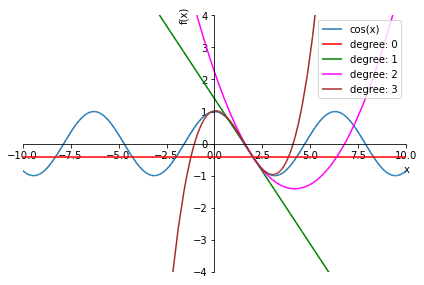

In [48]:
p = sympy.plot(f, (x, *(-10, 10)), show=False)
colors = ['red', 'green', 'magenta', 'brown']
for n, color in enumerate(colors, 1):
    approx = f.series(x, 2, n).removeO()
    p.extend(sympy.plot(approx, (x, *(-10, 10)),
                        line_color=color, show=False))
    p[n].label = f'degree: {n-1}'
p.ylim = (-4, 4)
p.xlim = (-10, 10)
p.legend = True
p.show()

__Exercise__ Repeat the above example for $g(x) = \sin(x)$, and $h(x) = \exp(x^2)$.

      Refrences:
      
  1- https://timothyprojectgig.github.io/JB_Math_Textbook/Undergrad/Calculus/4%20Derivatives.html
  
  2-Mathematics for Machine Learning" by Faisal, A. Aldo; Ong, Cheng Soon; and Deisenroth, Marc Peter, Chapter 2 (Vector Calculus), (2020).